# Spectra for CalCOFI lines 93 and 90

In [1]:
import time
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from netCDF4 import Dataset

from pyspec import spectrum as spec

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


In [2]:
line93 = np.load('uv_wavenumber_line93.npz')
line90 = np.load('uv_wavenumber_line90.npz')

line93_short = np.load('uv_wavenumber_line93_short.npz')
line90_short = np.load('uv_wavenumber_line90_short.npz')

In [3]:
line93_depth = np.load('uv_wavenumber_line93_depth.npz')
line90_depth = np.load('uv_wavenumber_line90_depth.npz')

line93_short_depth = np.load('uv_wavenumber_line93_short_depth.npz')
line90_short_depth = np.load('uv_wavenumber_line90_short_depth.npz')

In [4]:
calcofi_obs = io.loadmat('calcofi_obs.mat')

In [5]:
kr = np.array([1./700,1./5.])

def plot_oned_spec(line):
    """Plots 1d spec for calcofi line """
    
    plt.loglog(line['k'],line['Ev'].real.squeeze()/2.,label='across-track, hourly')
    plt.loglog(line['k'],line['Eu'].real.squeeze()/2.,label='along-track, hourly')
    plt.loglog(line['k'],line['Evd'].real.squeeze()/2.,'b--',label='across-track, daily-averaded')
    plt.loglog(line['k'],line['Eud'].real.squeeze()/2.,'g--',label='along-track,  daily-averaged')
    plt.xlabel('wavenumber [cpkm]')
    plt.ylabel(r'KE spectral density [m$^2$ s$^{-2}$/cpkm]')
    
    plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=2)
    plt.text(1./600.,1.2,'-2',fontsize=16)
    
    plt.xlim(1./800,1./5.)
    plt.legend(loc=3)
    
    plot_spec_error(sn=19)

def plot_spec_error(x=0.034,y=0.15, sn=200):
    Erl, Eru = spec.spec_error(y,sn=sn)

    try:
        nx = sn.size
        err=np.array(np.vstack([y-Erl,Eru-y]))        
        plt.errorbar(x, y, yerr=err.squeeze(), color='k',fmt='.')
        plt.text(x[0]-0.001,y[0],r'95 $\%$',fontsize=15)
    except: 
        err=np.array(np.vstack([y-Erl,Eru-y]))[...,np.newaxis]        
        plt.errorbar(x, y, yerr=err, color='k',fmt='.')
        plt.text(x+0.003,y-1.e-3,r'95 $\%$',fontsize=14)    

In [6]:
kobs = calcofi_obs['obs_line93']['k']

kobs = np.array([ 0.00153846,  0.00307692,  0.00461538,  0.00615385,  0.00769231,
         0.00923077,  0.01076923,  0.01230769,  0.01384615,  0.01538462,
         0.01692308,  0.01846154,  0.02      ,  0.02153846,  0.02307692,
         0.02461538,  0.02615385,  0.02769231,  0.02923077,  0.03076923,
         0.03230769,  0.03384615,  0.03538462,  0.03692308,  0.03846154,
         0.04      ,  0.04153846,  0.04307692,  0.04461538,  0.04615385,
         0.04769231,  0.04923077,  0.05076923,  0.05230769,  0.05384615,
         0.05538462,  0.05692308,  0.05846154,  0.06      ,  0.06153846,
         0.06307692,  0.06461538,  0.06615385,  0.06769231,  0.06923077,
         0.07076923,  0.07230769,  0.07384615,  0.07538462,  0.07692308,
         0.07846154,  0.08      ,  0.08153846,  0.08307692,  0.08461538,
         0.08615385,  0.08769231,  0.08923077,  0.09076923,  0.09230769,
         0.09384615,  0.09538462,  0.09692308,  0.09846154,  0.1       ])

Eu93 = np.array([ 0.5036019 ,  1.04792297,  1.03098288,  0.55253664,  0.42981114,
         0.35468618,  0.25434106,  0.18089919,  0.13385996,  0.0876717 ,
         0.06224362,  0.06514137,  0.07924876,  0.06161216,  0.05076693,
         0.03828877,  0.03972129,  0.03710378,  0.02793752,  0.02673034,
         0.02040961,  0.01881533,  0.01869829,  0.01438602,  0.01433046,
         0.01501169,  0.01375732,  0.01030178,  0.01031307,  0.00980714,
         0.00936661,  0.00841801,  0.00755414,  0.00795738,  0.00684824,
         0.00745783,  0.00566   ,  0.00479983,  0.00438937,  0.0042954 ,
         0.00394836,  0.0038401 ,  0.00399661,  0.00424043,  0.00332178,
         0.00361328,  0.00312997,  0.00292507,  0.0026387 ,  0.00234067,
         0.00276969,  0.00245022,  0.00339508,  0.00388117,  0.00285306,
         0.00249637,  0.00277948,  0.00261454,  0.00252869,  0.00254445,
         0.00218315,  0.00204116,  0.00205059,  0.0023966 ,  0.00221564])


Ev93 = np.array([ 0.87857667,  0.94566955,  0.60513447,  0.33192219,  0.22030031,
         0.15487253,  0.1030965 ,  0.08631912,  0.12074502,  0.0983867 ,
         0.06313871,  0.05925294,  0.06095603,  0.05344135,  0.05080769,
         0.03382594,  0.03239851,  0.03229142,  0.02834845,  0.0206021 ,
         0.01593969,  0.01699273,  0.01460866,  0.01196486,  0.00931381,
         0.01218938,  0.01311267,  0.01392454,  0.01193921,  0.00852296,
         0.00794066,  0.0068035 ,  0.00764737,  0.00714187,  0.00678173,
         0.00595592,  0.00439688,  0.00436624,  0.00459415,  0.00516337,
         0.00361911,  0.00357124,  0.00363292,  0.00351259,  0.00367168,
         0.00314714,  0.00342035,  0.00263849,  0.00245308,  0.00277435,
         0.00256889,  0.00284759,  0.0033773 ,  0.00249248,  0.00212143,
         0.00245994,  0.00267069,  0.00240312,  0.00210245,  0.00237302,
         0.00239491,  0.00214751,  0.00180978,  0.00256252,  0.00284527])

Ev93_short = np.array([ 0.76713777,  0.68160279,  0.3553138 ,  0.22468252,  0.12163576,
         0.07169936,  0.05289293,  0.05707854,  0.05637054,  0.04469122,
         0.03408983,  0.02507851,  0.02395288,  0.02121811,  0.01507427,
         0.01163447,  0.00986208,  0.00813394,  0.00858136,  0.00904516,
         0.00660638,  0.00539732,  0.00526462,  0.00438061,  0.00406673,
         0.00305428,  0.00329681,  0.00281071,  0.00242144,  0.00253952,
         0.00253994,  0.00201306,  0.00221301,  0.00218213,  0.00246896,
         0.0023292 ,  0.00220161,  0.00196537,  0.00176304,  0.00178631])

kobs_short = np.array([0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,  0.015 ,  0.0175,
         0.02  ,  0.0225,  0.025 ,  0.0275,  0.03  ,  0.0325,  0.035 ,
         0.0375,  0.04  ,  0.0425,  0.045 ,  0.0475,  0.05  ,  0.0525,
         0.055 ,  0.0575,  0.06  ,  0.0625,  0.065 ,  0.0675,  0.07  ,
         0.0725,  0.075 ,  0.0775,  0.08  ,  0.0825,  0.085 ,  0.0875,
         0.09  ,  0.0925,  0.095 ,  0.0975,  0.1  ])

In [7]:
calcofi_obs['obs_line93_short']['k'][0]

array([ array([[ 0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,  0.015 ,  0.0175,
         0.02  ,  0.0225,  0.025 ,  0.0275,  0.03  ,  0.0325,  0.035 ,
         0.0375,  0.04  ,  0.0425,  0.045 ,  0.0475,  0.05  ,  0.0525,
         0.055 ,  0.0575,  0.06  ,  0.0625,  0.065 ,  0.0675,  0.07  ,
         0.0725,  0.075 ,  0.0775,  0.08  ,  0.0825,  0.085 ,  0.0875,
         0.09  ,  0.0925,  0.095 ,  0.0975,  0.1   ]])], dtype=object)

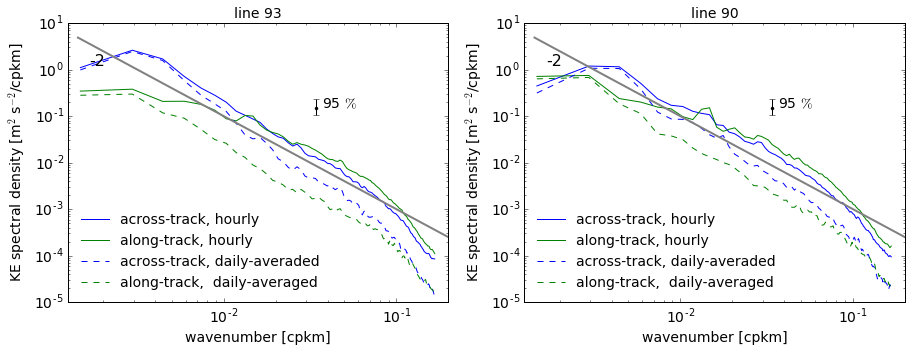

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plot_oned_spec(line93)
plt.title('line 93')

plt.subplot(122)
plot_oned_spec(line90)
plt.title('line 90')


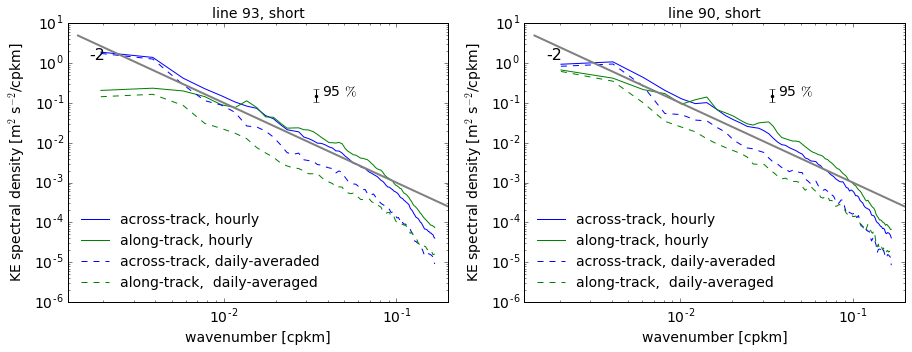

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plot_oned_spec(line93_short)
plt.title('line 93, short')

plt.subplot(122)
plot_oned_spec(line90_short)
plt.title('line 90, short')

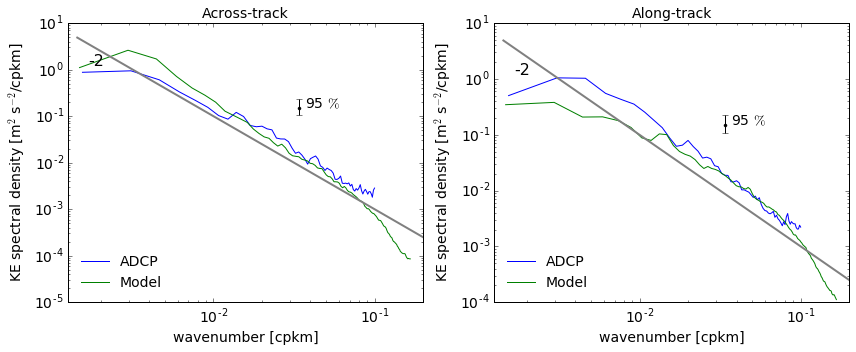

In [10]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.loglog(kobs,Ev93,label='ADCP')
plt.loglog(line93['k'],line93['Ev'].real.squeeze()/2.,label='Model')

plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=2)
plt.text(1./600.,1.2,'-2',fontsize=16)
    
plt.xlim(1./800,1./5.)
plt.legend(loc=3)
plt.title('Across-track') 
plot_spec_error(sn=19)
plt.xlabel('wavenumber [cpkm]')
plt.ylabel(r'KE spectral density [m$^2$ s$^{-2}$/cpkm]')

plt.subplot(122)
plt.loglog(kobs,Eu93,label='ADCP')
plt.loglog(line93['k'],line93['Eu'].real.squeeze()/2.,label='Model')

plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=2)
plt.text(1./600.,1.2,'-2',fontsize=16)
    
plt.xlim(1./800,1./5.)
plt.legend(loc=3)
plt.title('Along-track') 
plot_spec_error(sn=19)

plt.xlabel('wavenumber [cpkm]')
plt.ylabel(r'KE spectral density [m$^2$ s$^{-2}$/cpkm]')

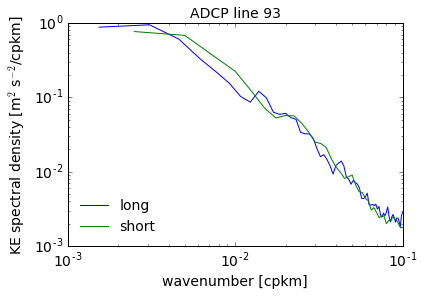

In [11]:
plt.loglog(kobs,Ev93,label='long')
plt.loglog(kobs_short,Ev93_short,label='short')
plt.legend(loc=3)
plt.xlabel('wavenumber [cpkm]')
plt.ylabel(r'KE spectral density [m$^2$ s$^{-2}$/cpkm]')
plt.title('ADCP line 93')

In [12]:
fno = Dataset("calcofi_llc4320.nc", "w", format="NETCDF4")

In [13]:
fno.createGroup("line93")
fno.createGroup("line90")
fno.createGroup("line93_short")
fno.createGroup("line90_short")

<type 'netCDF4._netCDF4.Group'>
group /line90_short:
    dimensions(sizes): 
    variables(dimensions): 
    groups: 

In [14]:
def create_variables(line="93"):
    """create dimensions and variables for
        specific line"""
    data=eval("line"+line)
    fno.createDimension("k"+line, data['k'].size)

    ks = fno.createVariable("line"+line+"/k","f8",("k"+line,))
    Eu = fno.createVariable("line"+line+"/Eu","f8",("k"+line,))
    Ev = fno.createVariable("line"+line+"/Ev","f8",("k"+line,))
    Eud = fno.createVariable("line"+line+"/Eud","f8",("k"+line,))
    Evd = fno.createVariable("line"+line+"/Evd","f8",("k"+line,))
    
    ks[:], Eu[:], Ev[:] = data['k'], data['Eu'].real, data['Ev'].real
    Eud[:], Evd[:] = data['Eud'].real, data['Evd'].real
    
    ks.units = "cycles/km"
    ks.description = "Along-track wavenumber"
    Eu.units = u"m^2 s^{-2} / (cycles/km)"
    Eu.description = u"Along-track velocity variance spectral density"
    Ev.description = u"Along-track velocity variance spectral density"
    

In [15]:
create_variables(line="90")
create_variables(line="93")
create_variables(line="90_short")
create_variables(line="93_short")

In [16]:
fno.description = "LLC 4320 wavenumber spectra along  CalCOFI lines.\
 The short groups do not include the segments associated\
 with the four stations closest to short."

In [17]:
fno.history = "Created by Cesar Rocha (crocha@ucsd.edu) on " + time.ctime(time.time())

In [18]:
fno

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    description: LLC 4320 wavenumber spectra along  CalCOFI lines. The short groups do not include the segments associated with the four stations closest to short.
    history: Created by Cesar Rocha (crocha@ucsd.edu) on Mon Feb  1 17:52:27 2016
    dimensions(sizes): k90(114), k93(114), k90_short(83), k93_short(87)
    variables(dimensions): 
    groups: line93, line90, line93_short, line90_short

In [19]:
fno.close()

# Depth dependence

In [20]:
line93_depth.keys()

['z', 'd', 'lon', 'Eud', 'k', 'Evd', 'lat', 'Eu', 'Ev']

In [21]:
z = np.load('llc4320_vertical_levels.npz')['z'][:88]

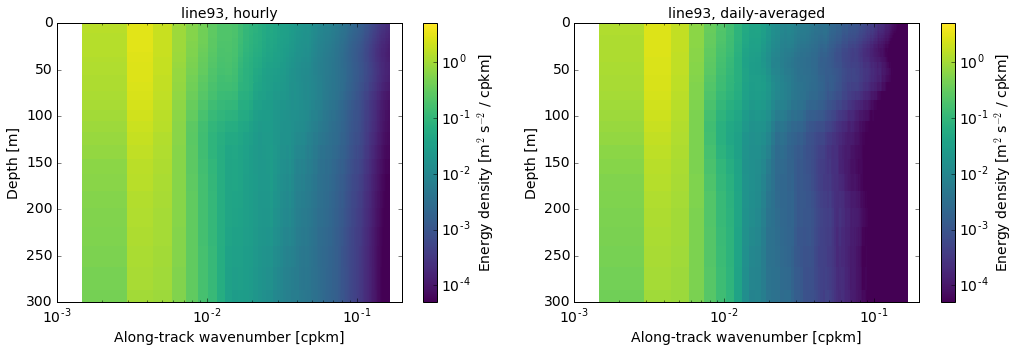

In [22]:
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(121)

E = (line93_depth['Eu']+line93_depth['Ev'])[:,1:].real/2.

plt.pcolormesh(line93_depth['k'][1:],-z,E,
          norm = LogNorm())
ax.set_xscale('log')
plt.clim([5.e-5,5.e0])
plt.colorbar(label=r'Energy density [m$^2$ s$^{-2}$ / cpkm]')
plt.xlabel(r'Along-track wavenumber [cpkm]')
plt.ylabel(r'Depth [m]')
plt.ylim(300,0)
plt.xlim(1./1000.,1./5.)
plt.title('line93, hourly')

ax = fig.add_subplot(122)
Ed = (line93_depth['Eud']+line93_depth['Evd'])[:,1:].real/2.
plt.pcolormesh(line93_depth['k'][1:],-z,Ed,
          norm = LogNorm())
ax.set_xscale('log')
plt.clim([5.e-5,5.e0])
plt.colorbar(label=r'Energy density [m$^2$ s$^{-2}$ / cpkm]')
plt.xlabel(r'Along-track wavenumber [cpkm]')
plt.ylabel(r'Depth [m]')
plt.ylim(300,0)
plt.xlim(1./1000.,1./5.)
plt.title('line93, daily-averaged')

In [23]:
z[19]

-73.099998

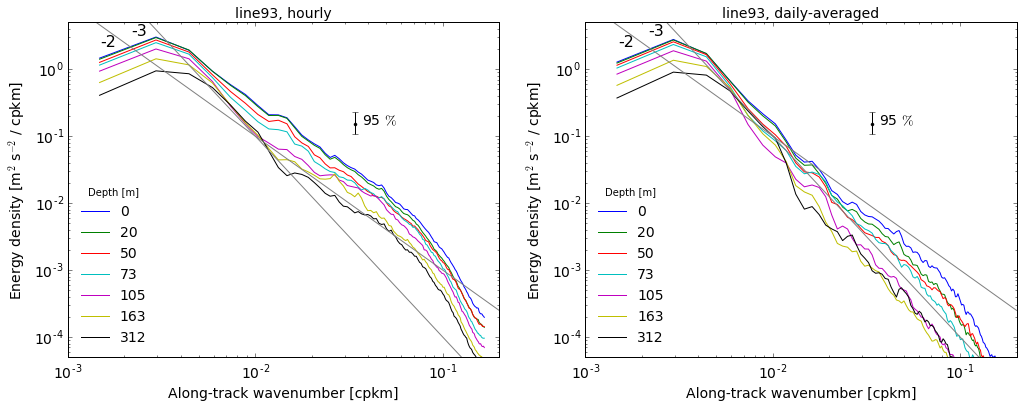

In [24]:
plt.figure()

fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(121)
plt.loglog(line93_depth['k'][1:],E[0],label=r'0')
plt.loglog(line93_depth['k'][1:],E[10],label=r'20')
plt.loglog(line93_depth['k'][1:],E[16],label=r'50')
plt.loglog(line93_depth['k'][1:],E[19],label=r'73')
plt.loglog(line93_depth['k'][1:],E[22],label=r'105')
plt.loglog(line93_depth['k'][1:],E[26],label=r'163')
plt.loglog(line93_depth['k'][1:],E[33],label=r'312')
plt.legend(loc=3,title='Depth [m]')
plt.ylim(5.e-5,5.e0)
plt.xlim(1./1000.,1./5.)
plot_spec_error(sn=19)
plt.title('line93, hourly')
plt.ylabel(r'Energy density [m$^2$ s$^{-2}$ / cpkm]')
plt.xlabel(r'Along-track wavenumber [cpkm]')

plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=1)
plt.text(1./670.,2.2,'-2',fontsize=16)

plt.loglog(kr,kr**-3/1.e7,color='0.5',linewidth=1)
plt.text(1./460.,3.2,'-3',fontsize=16)

ax = fig.add_subplot(122)
plt.loglog(line93_depth['k'][1:],Ed[0],label=r'0')
plt.loglog(line93_depth['k'][1:],Ed[10],label=r'20')
plt.loglog(line93_depth['k'][1:],Ed[16],label=r'50')
plt.loglog(line93_depth['k'][1:],Ed[19],label=r'73')
plt.loglog(line93_depth['k'][1:],Ed[22],label=r'105')
plt.loglog(line93_depth['k'][1:],Ed[26],label=r'163')
plt.loglog(line93_depth['k'][1:],Ed[33],label=r'312')
plt.legend(loc=3,title='Depth [m]')
plt.ylim(5.e-5,5.e0)
plt.xlim(1./1000.,1./5.)
plot_spec_error(sn=19)
plt.title('line93, daily-averaged')
plt.ylabel(r'Energy density [m$^2$ s$^{-2}$ / cpkm]')
plt.xlabel(r'Along-track wavenumber [cpkm]')

plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=1)
plt.text(1./670.,2.2,'-2',fontsize=16)

plt.loglog(kr,kr**-3/1.e7,color='0.5',linewidth=1)
plt.text(1./460.,3.2,'-3',fontsize=16)

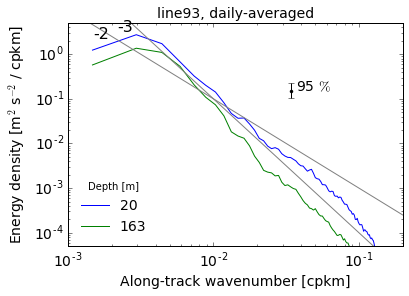

In [25]:
plt.figure()
plt.loglog(line93_depth['k'][1:],Ed[10],label=r'20')
plt.loglog(line93_depth['k'][1:],Ed[26],label=r'163')

plt.legend(loc=3,title='Depth [m]')
plt.ylim(5.e-5,5.e0)
plt.xlim(1./1000.,1./5.)
plot_spec_error(sn=19)
plt.title('line93, daily-averaged')
plt.ylabel(r'Energy density [m$^2$ s$^{-2}$ / cpkm]')
plt.xlabel(r'Along-track wavenumber [cpkm]')

plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=1)
plt.text(1./670.,2.2,'-2',fontsize=16)

plt.loglog(kr,kr**-3/1.e7,color='0.5',linewidth=1)
plt.text(1./460.,3.2,'-3',fontsize=16)

In [26]:
# Average on same slabs as Teri's

In [27]:
Eu93_short = line93_short_depth['Eu'][9:18].mean(axis=0)
Ev93_short = line93_short_depth['Ev'][9:18].mean(axis=0)

Eud93_short = line93_short_depth['Eud'][9:18].mean(axis=0)
Evd93_short = line93_short_depth['Evd'][9:18].mean(axis=0)

Eu93 = line93_depth['Eu'][9:18].mean(axis=0)
Ev93 = line93_depth['Ev'][9:18].mean(axis=0)

Eud93 = line93_depth['Eud'][9:18].mean(axis=0)
Evd93 = line93_depth['Evd'][9:18].mean(axis=0)

Eu90_short = line90_short_depth['Eu'][9:18].mean(axis=0)
Ev90_short = line90_short_depth['Ev'][9:18].mean(axis=0)

Eud90_short = line90_short_depth['Eud'][9:18].mean(axis=0)
Evd90_short = line90_short_depth['Evd'][9:18].mean(axis=0)

Eu90 = line90_depth['Eu'][9:18].mean(axis=0)
Ev90 = line90_depth['Ev'][9:18].mean(axis=0)

Eud90 = line90_depth['Eud'][9:18].mean(axis=0)
Evd90 = line90_depth['Evd'][9:18].mean(axis=0)


k93short = line93_short_depth['k']
k90short = line90_short_depth['k']

k93 = line93_depth['k']
k90 = line90_depth['k']

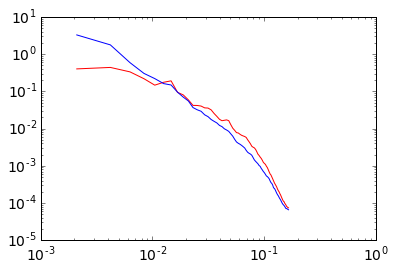

In [28]:
plt.loglog(line93_short_depth['k'],Eu93_short.real,color='r')
plt.loglog(line93_short_depth['k'],Ev93_short.real,color='b')

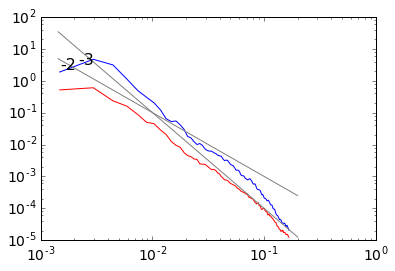

In [29]:
plt.loglog(line93_depth['k'],Eud93.real,color='r')
plt.loglog(line93_depth['k'],Evd93.real,color='b')

plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=1)
plt.text(1./670.,2.2,'-2',fontsize=16)

plt.loglog(kr,kr**-3/1.e7,color='0.5',linewidth=1)
plt.text(1./460.,3.2,'-3',fontsize=16)

In [30]:
fno = Dataset("calcofi_llc4320.nc", "w", format="NETCDF4")

In [31]:
def create_variables(k,Eu,Ev,Eud, Evd,line="93"):
    """create dimensions and variables for
        specific line"""
    data=eval("line"+line)
    fno.createDimension("k"+line, k.size)

    ks = fno.createVariable("line"+line+"/k","f8",("k"+line,))
    Eu = fno.createVariable("line"+line+"/Eu","f8",("k"+line,))
    Ev = fno.createVariable("line"+line+"/Ev","f8",("k"+line,))
    Eud = fno.createVariable("line"+line+"/Eud","f8",("k"+line,))
    Evd = fno.createVariable("line"+line+"/Evd","f8",("k"+line,))
    
    ks[:], Eu[:], Ev[:] = k, Eu, Ev
    Eud[:], Evd[:] = Eud, Evd
    
    ks.units = "cycles/km"
    ks.description = "Along-track wavenumber"
    Eu.units = u"m^2 s^{-2} / (cycles/km)"
    Eu.description = u"Along-track velocity variance spectral density"
    Ev.description = u"Along-track velocity variance spectral density"
    

In [32]:
create_variables(k=k93,Eu=Eu93,Ev=Ev93,Eud=Eud93, Evd=Evd93,line="93")

In [33]:
create_variables(k=k93short,Eu=Eu93_short,Ev=Ev93_short,Eud=Eud93_short, Evd=Evd93_short,line="93_short")

In [34]:
create_variables(k=k90,Eu=Eu90,Ev=Ev90,Eud=Eud90, Evd=Evd90,line="90")

In [35]:
create_variables(k=k90short,Eu=Eu90_short,Ev=Ev90_short,Eud=Eud90_short, Evd=Evd90_short,line="90_short")

In [36]:
fno.description = "LLC 4320 wavenumber spectra along  CalCOFI lines.\
 The short groups do not include the segments associated\
 with the four stations closest to short."

In [37]:
fno.history = "Created by Cesar Rocha (crocha@ucsd.edu) on " + time.ctime(time.time())

In [38]:
fno.close()

In [39]:
fno = Dataset("calcofi_llc4320_depth.nc", "w", format="NETCDF4")

def create_variables(k,Eu,Ev,Eud, Evd,z,line="93"):
    """create dimensions and variables for
        specific line"""
    data=eval("line"+line)
    fno.createDimension("k"+line, k.size)
    fno.createDimension("z"+line, z.size)

    z = fno.createVariable("line"+line+"/z","f8",("z"+line,))
    ks = fno.createVariable("line"+line+"/k","f8",("k"+line,))
    Eus = fno.createVariable("line"+line+"/Eu","f8",("z"+line,"k"+line,))
    Evs = fno.createVariable("line"+line+"/Ev","f8",("z"+line,"k"+line,))
    Eusd = fno.createVariable("line"+line+"/Eud","f8",("z"+line,"k"+line,))
    Evsd = fno.createVariable("line"+line+"/Evd","f8",("z"+line,"k"+line,))
    z
    ks[:], Eus[:], Evs[:] = k, Eu, Ev
    Eusd[:], Evsd[:] = Eud, Evd
    
    ks.units = "cycles/km"
    ks.description = "Along-track wavenumber"
    Eus.units = u"m^2 s^{-2} / (cycles/km)"
    Eus.description = u"Along-track velocity variance spectral density"
    Evs.description = u"Along-track velocity variance spectral density"
    

In [40]:
create_variables(k=line93_depth['k'],Eu=np.real(line93_depth['Eu']),Ev=np.real(line93_depth['Ev']),
                 Eud=np.real(line93_depth['Eud']), Evd=np.real(line93_depth['Evd']),z=z,line="93")

In [41]:
create_variables(k=line90_depth['k'],Eu=line90_depth['Eu'],Ev=line90_depth['Ev'],
                 Eud=line90_depth['Eud'], Evd=line90_depth['Evd'],z=z,line="90")

/Users/crocha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/crocha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


In [42]:
create_variables(k=line93_short_depth['k'],Eu=line93_short_depth['Eu'],Ev=line93_short_depth['Ev'],
                 Eud=line93_short_depth['Eud'], Evd=line93_short_depth['Evd'],z=z,line="93_short")

/Users/crocha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/crocha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


In [43]:
create_variables(k=line90_short_depth['k'],Eu=line90_short_depth['Eu'],Ev=line90_short_depth['Ev'],
                 Eud=line90_short_depth['Eud'], Evd=line90_short_depth['Evd'],z=z,line="90_short")

/Users/crocha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/crocha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


In [44]:
fno.description = "LLC 4320 wavenumber spectra as a function of depth along  CalCOFI lines.\
 The short groups do not include the segments associated\
 with the four stations closest to short."

In [45]:
fno.history = "Created by Cesar Rocha (crocha@ucsd.edu) on " + time.ctime(time.time())

In [54]:
fno['line93']['Eu'][:]

array([[  3.77170096e-01,   7.01141244e-01,   7.80048066e-01, ...,
          2.73696634e-04,   2.69004161e-04,   2.58907511e-04],
       [  3.77427103e-01,   7.00734214e-01,   7.80032059e-01, ...,
          2.69903732e-04,   2.65508596e-04,   2.55582153e-04],
       [  3.76668847e-01,   6.99675344e-01,   7.79726735e-01, ...,
          2.65030418e-04,   2.61065784e-04,   2.51378931e-04],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [55]:
fno.close()